In [14]:
# necessary for NLTKTextSplitter to work
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/kristof/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Number of chunks (Recursive): 392


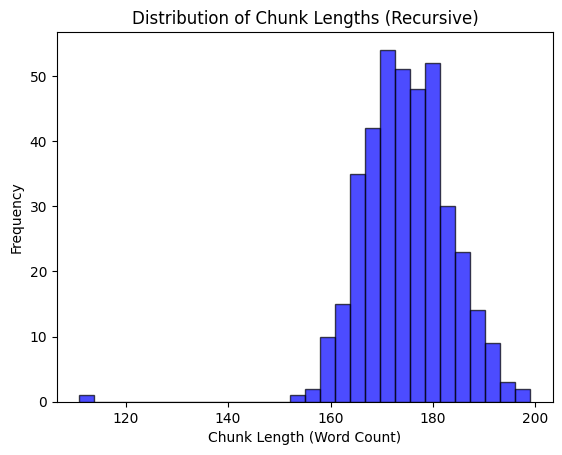

Created a chunk of size 1399, which is longer than the specified 1024
Created a chunk of size 1506, which is longer than the specified 1024
Created a chunk of size 2805, which is longer than the specified 1024
Created a chunk of size 5189, which is longer than the specified 1024
Created a chunk of size 1278, which is longer than the specified 1024
Created a chunk of size 1136, which is longer than the specified 1024
Created a chunk of size 1233, which is longer than the specified 1024
Created a chunk of size 3463, which is longer than the specified 1024
Created a chunk of size 1267, which is longer than the specified 1024
Created a chunk of size 1509, which is longer than the specified 1024
Created a chunk of size 1104, which is longer than the specified 1024
Created a chunk of size 1459, which is longer than the specified 1024
Created a chunk of size 1355, which is longer than the specified 1024
Created a chunk of size 1215, which is longer than the specified 1024
Created a chunk of s

Number of chunks (NLTK): 405


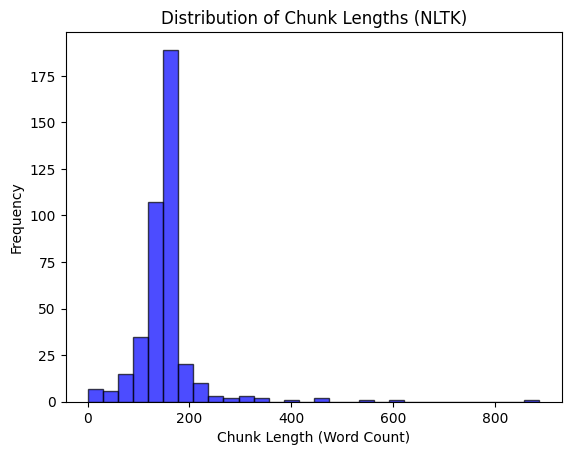

In [ ]:
from PyPDF2 import PdfReader
import matplotlib.pyplot as plt
import re
import os
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.text_splitter import NLTKTextSplitter

def clean_text(text: str) -> str:
    text = re.sub(r'\s+', ' ', text) # remove extra whitespace
    text = re.sub(r'[^\x20-\x7E]', '', text) # remove non-printable characters
    text = re.sub(r' +', ' ', text) # remove multiple spaces
    return text

def chunk_text_recursive(text: str, chunk_size: int = 1024, overlap: int = 100) -> list:
    splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=overlap)
    chunks = splitter.split_text(text)
    return chunks

def chunk_text_nltk(text: str, chunk_size: int = 1024, overlap: int = 100) -> list:
    splitter = NLTKTextSplitter(chunk_size=chunk_size, chunk_overlap=overlap)
    chunks = splitter.split_text(text)
    return chunks

def plot_chunk_lengths_histogram(chunks, title="Distribution of Chunk Lengths"):
    chunk_lengths = [len(chunk.split()) for chunk in chunks]  # Calculate word count for each chunk
    
    plt.hist(chunk_lengths, bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Chunk Length (Word Count)')
    plt.ylabel('Frequency')
    plt.show()

def read_pdf(file_path: str, chunk_text_func) -> dict: 
    if not os.path.isfile(file_path):
        raise FileNotFoundError(f"No such file: '{file_path}'")

    try:
        pdf_reader = PdfReader(file_path)
        extracted_text = ""
        for page in pdf_reader.pages:
            extracted_text += page.extract_text()
        
        # Clean the extracted text
        cleaned_text = clean_text(extracted_text)
        
        chunks = chunk_text_func(cleaned_text)
        
        return {"chunks": chunks}

    except Exception as e:
        raise Exception(f"An error occurred: {str(e)}")

file_path = "gdpr.pdf"

# Using RecursiveCharacterTextSplitter
result_recursive = read_pdf(file_path, chunk_text_recursive)
print(f"Number of chunks (Recursive): {len(result_recursive['chunks'])}")

plot_chunk_lengths_histogram(result_recursive['chunks'], title="Distribution of Chunk Lengths (Recursive)")

# Using NLTKTextSplitter
result_nltk = read_pdf(file_path, chunk_text_nltk)
print(f"Number of chunks (NLTK): {len(result_nltk['chunks'])}")

plot_chunk_lengths_histogram(result_nltk['chunks'], title="Distribution of Chunk Lengths (NLTK)")